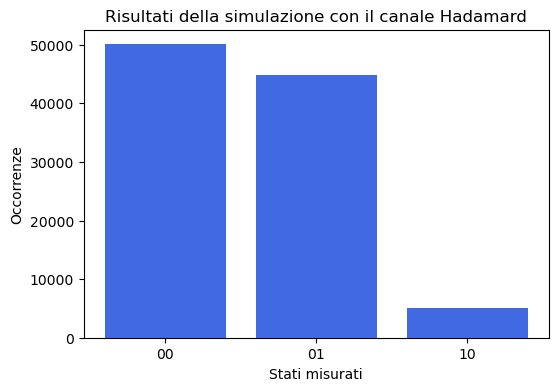

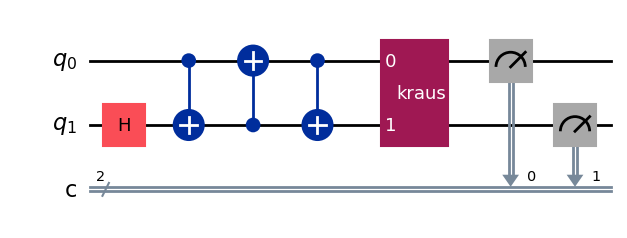

In [35]:
from qiskit.quantum_info import DensityMatrix
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.quantum_info import Kraus, SuperOp

shots = 100000

# Operatori di Kraus: Identità e Hadamard su entrambi i qubit
K0 = np.sqrt(0.9) * np.eye(4)  # Identità con probabilità 90%
H2 = np.array([[1, 1, 1, 1], 
               [1, -1, 1, -1], 
               [1, 1, -1, -1], 
               [1, -1, -1, 1]]) / 2  # Hadamard su entrambi i qubit
K1 = np.sqrt(0.1) * H2  # Hadamard con probabilità 10%

# Creazione del canale quantistico multi-qubit
multi_qubit_channel = Kraus([K0, K1])

# Creazione di un circuito quantistico su 2 qubit
qc = QuantumCircuit(2, 2)

qc.h(1)
qc.cx(0, 1)  # Entanglement con una CNOT
qc.cx(1, 0)  # Entanglement con una CNOT
qc.cx(0, 1)  # Entanglement con una CNOT

# Applicazione del canale quantistico collettivo
qc.append(SuperOp(multi_qubit_channel), [0, 1])

# Misura dei qubit
qc.measure([0, 1], [0, 1])

# Simulazione
simulator = Aer.get_backend('aer_simulator')
qc = transpile(qc, simulator)
result = simulator.run(qc, shots=shots ).result()

counts = result.get_counts()

# Plot dei risultati
plt.figure(figsize=(6,4))
plt.bar(counts.keys(), counts.values(), color='royalblue')
plt.xlabel("Stati misurati")
plt.ylabel("Occorrenze")
plt.title("Risultati della simulazione con il canale Hadamard")
plt.show()
qc.draw(output='mpl')
